# Import Libraries

In [145]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold

import matplotlib.pyplot as plt

import seaborn as sns

from imblearn import FunctionSampler

import warnings
warnings.filterwarnings('ignore')

Import Data

In [146]:
df= pd.read_csv('wine.csv')

# EDA & Data Preprocessing

In [147]:
df.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [149]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [150]:
df.isnull().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


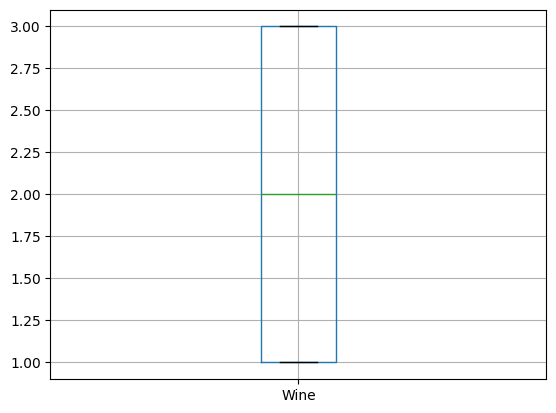

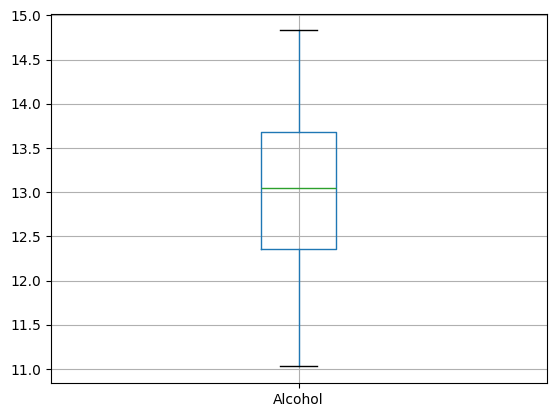

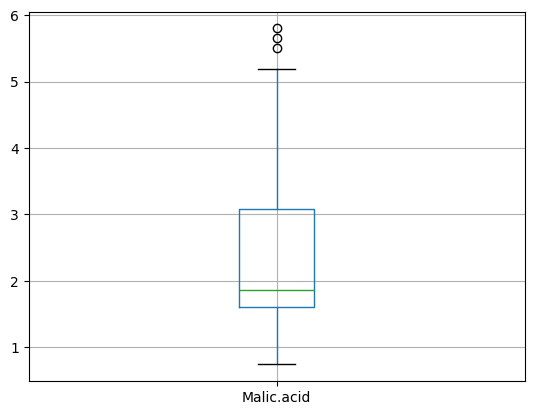

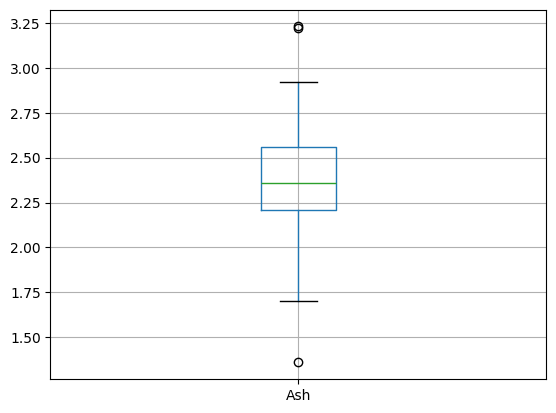

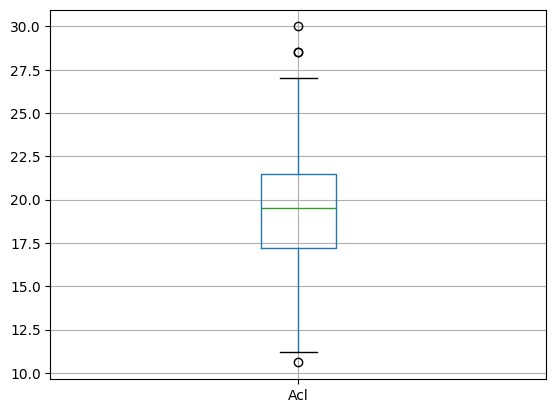

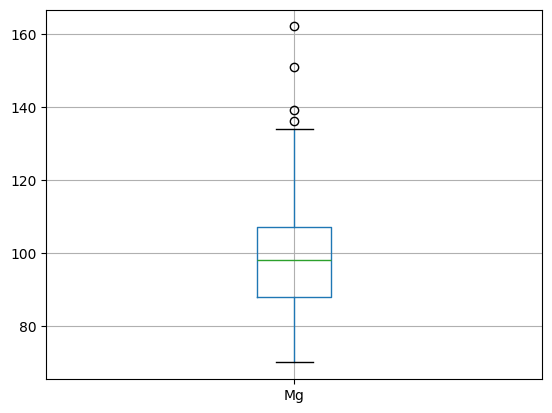

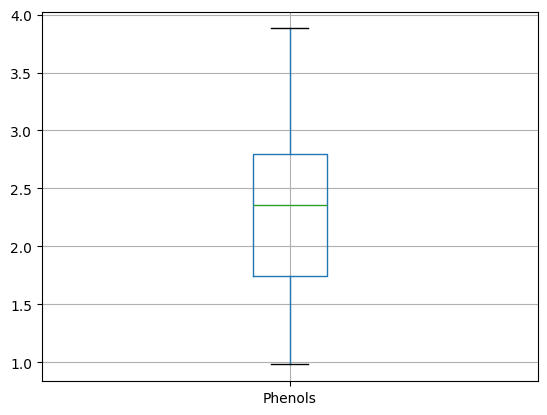

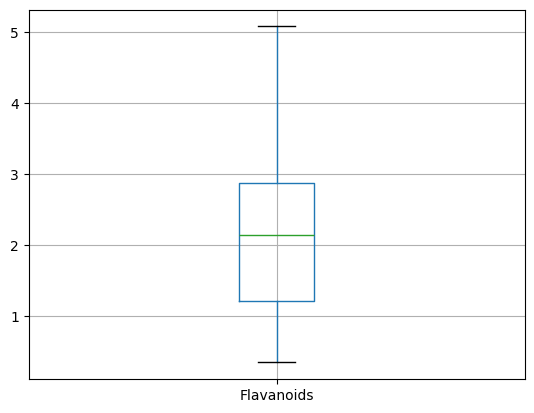

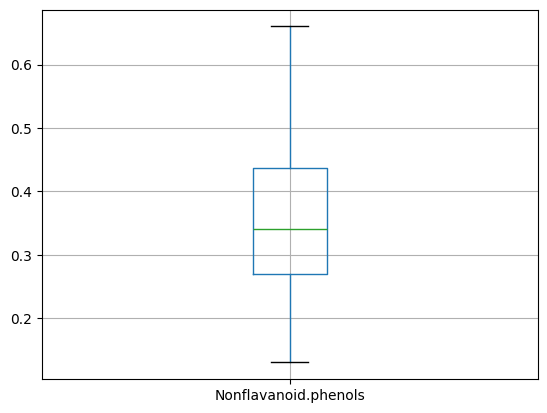

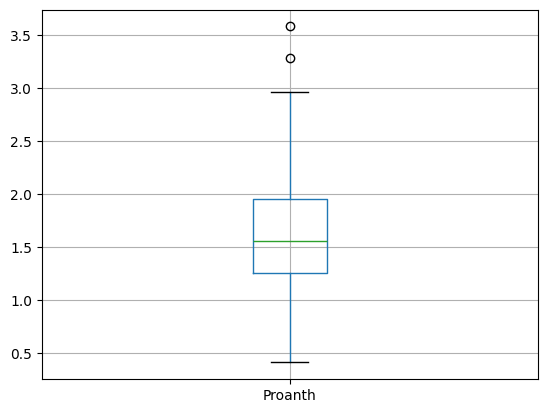

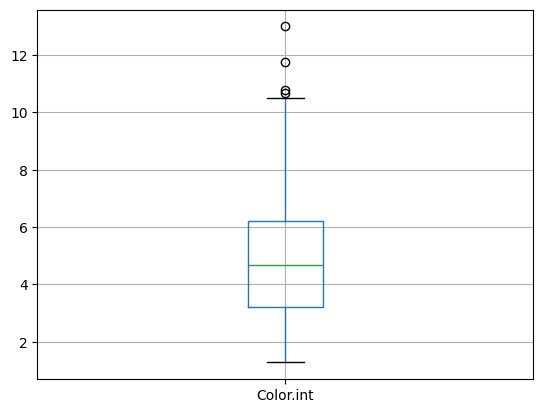

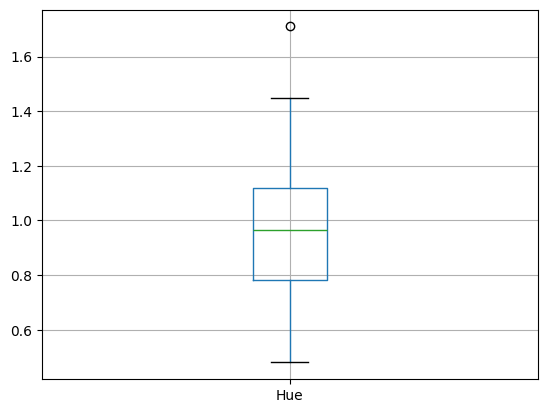

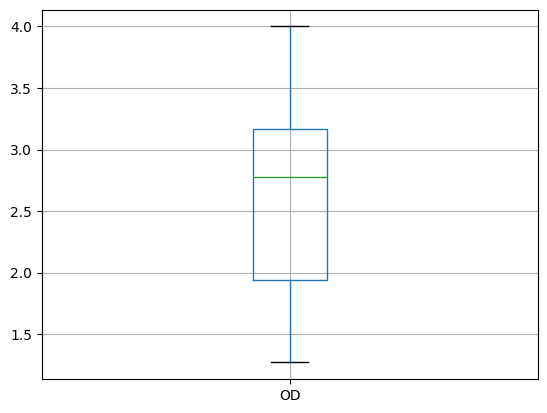

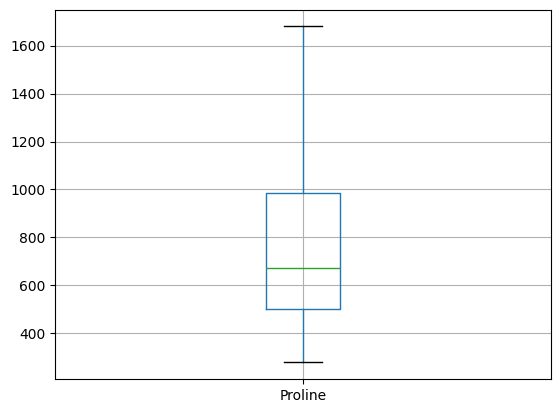

In [151]:
#for every column in df print plot box
for col in df.columns:
    df.boxplot(column=col)
    plt.show()

In [152]:
outlier_column = ['Malic.acid', 'Ash', 'Acl', 'Mg', 'Proanth', 'Color.int', 'Hue']

In [153]:
def IQR_Outliers (X, features):

    print('Number of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))

    out_indexlist = []

    for col in features:
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)

        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)

        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        print('Outliers Index: ', outliers_index)
        print('Outliers: ', outliers)

        out_indexlist.extend(outliers_index)

    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    print('List of rows with outliers: ', out_indexlist)


IQR_Outliers(df, df.columns.tolist())

Number of features:  14
Features:  ['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']
Number of samples:  178

Feature:  Wine
Upper and Lower limits:  6.0 -2.0
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  Alcohol
Upper and Lower limits:  15.650000000000002 10.389999999999997
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  Malic.acid
Upper and Lower limits:  5.3025 -0.6174999999999997
Number of outliers:  3
Outliers Index:  [123, 137, 173]
Outliers:  [5.8  5.51 5.65]

Feature:  Ash
Upper and Lower limits:  3.0787500000000003 1.6887499999999998
Number of outliers:  3
Outliers Index:  [25, 59, 121]
Outliers:  [3.22 1.36 3.23]

Feature:  Acl
Upper and Lower limits:  27.950000000000003 10.749999999999998
Number of outliers:  4
Outliers Index:  [59, 73, 121, 127]
Outliers:  [10.6 30.  28.5 28.5]

Feature:  Mg
Upper and Lower limits:  135.5 59.5
Number

there are some outlier in some data but not much

In [154]:
corr = df.corr()
corr.style.background_gradient(cmap='YlGnBu')

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


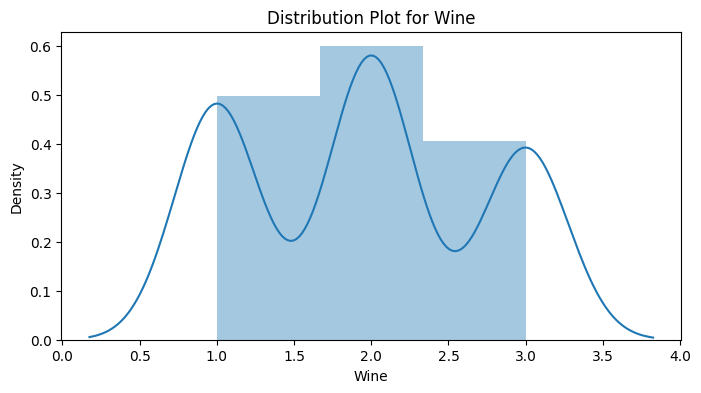

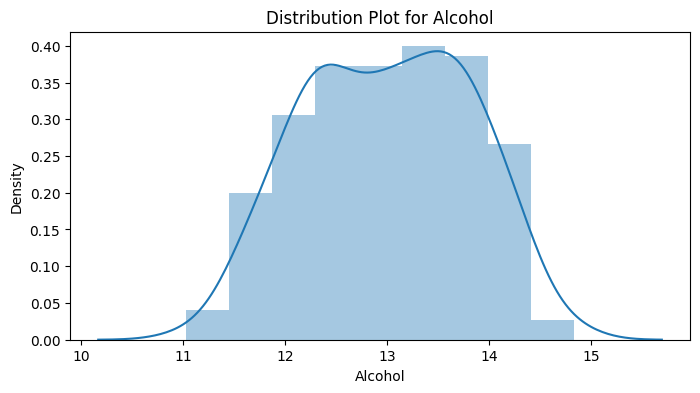

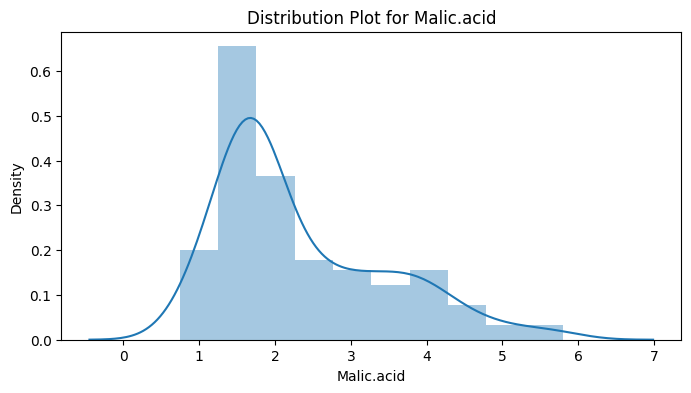

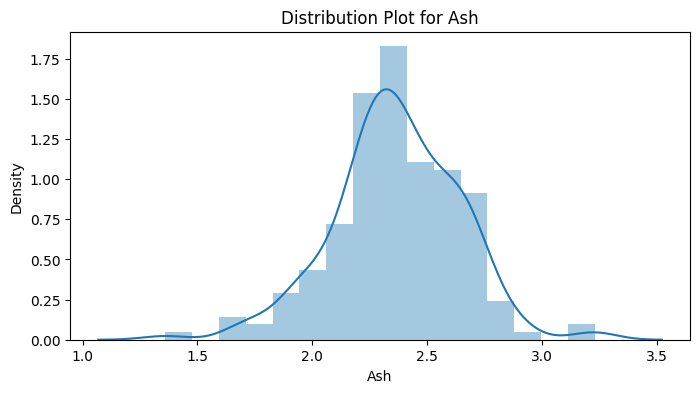

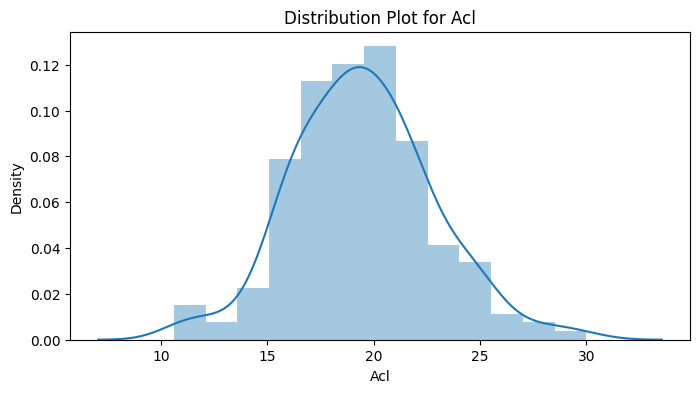

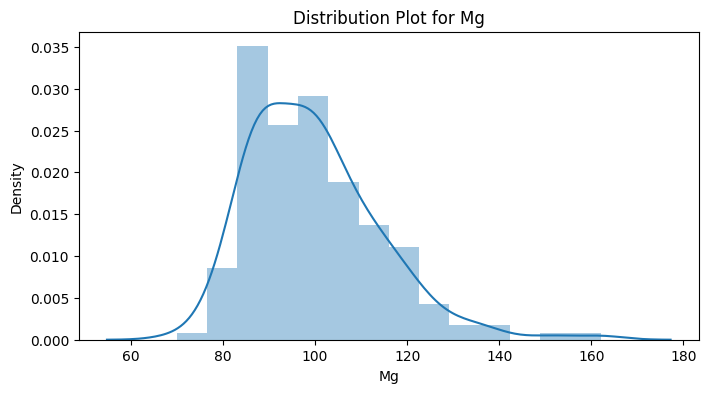

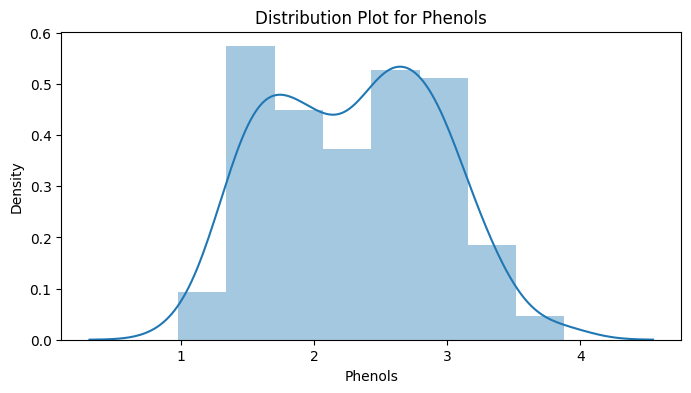

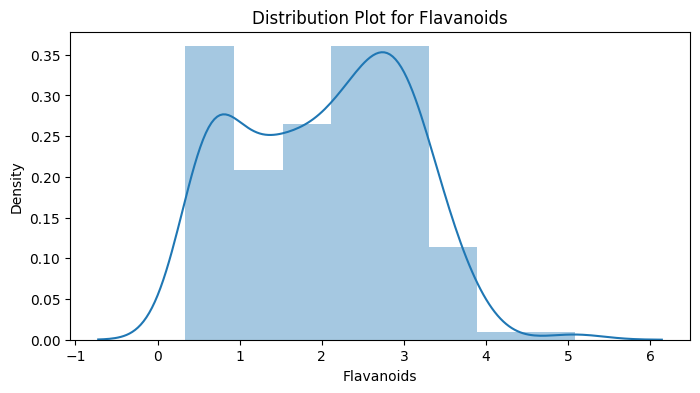

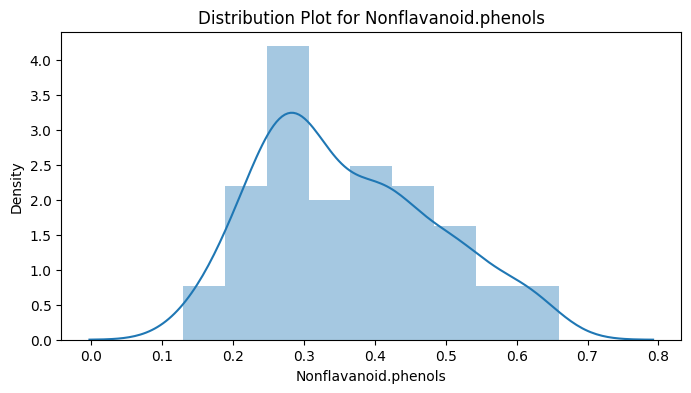

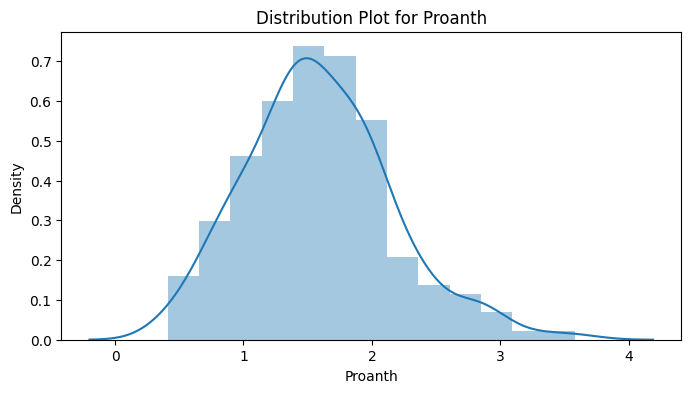

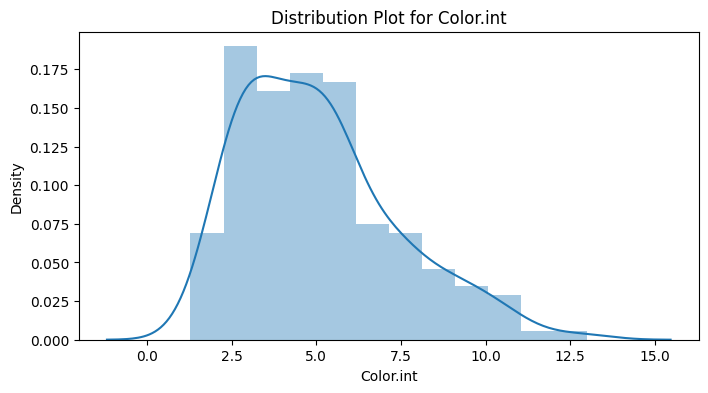

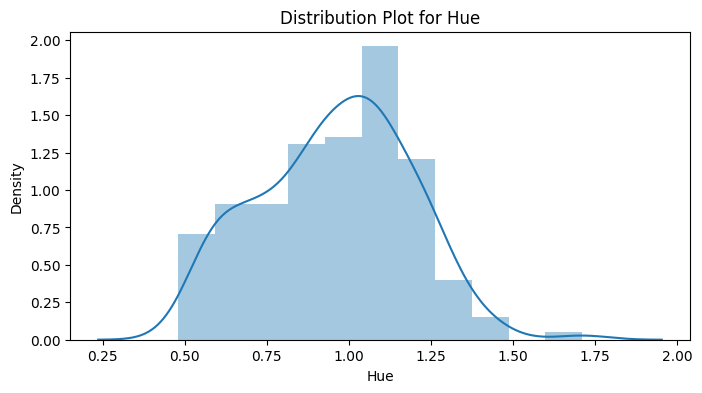

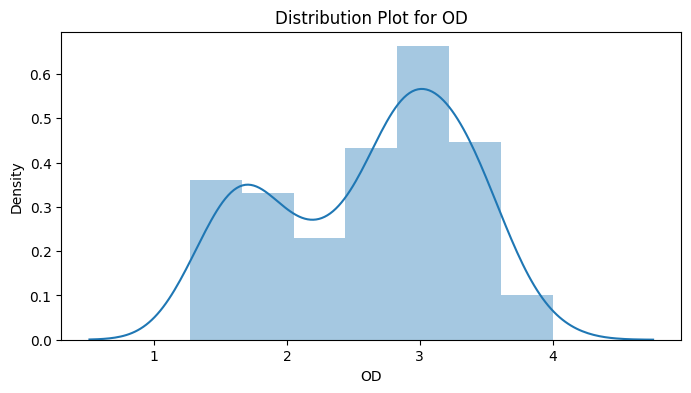

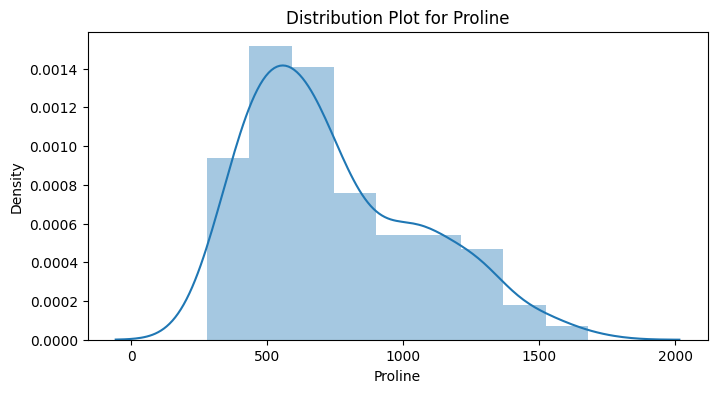

In [155]:
for column in df.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(df[column], kde=True, hist=True)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

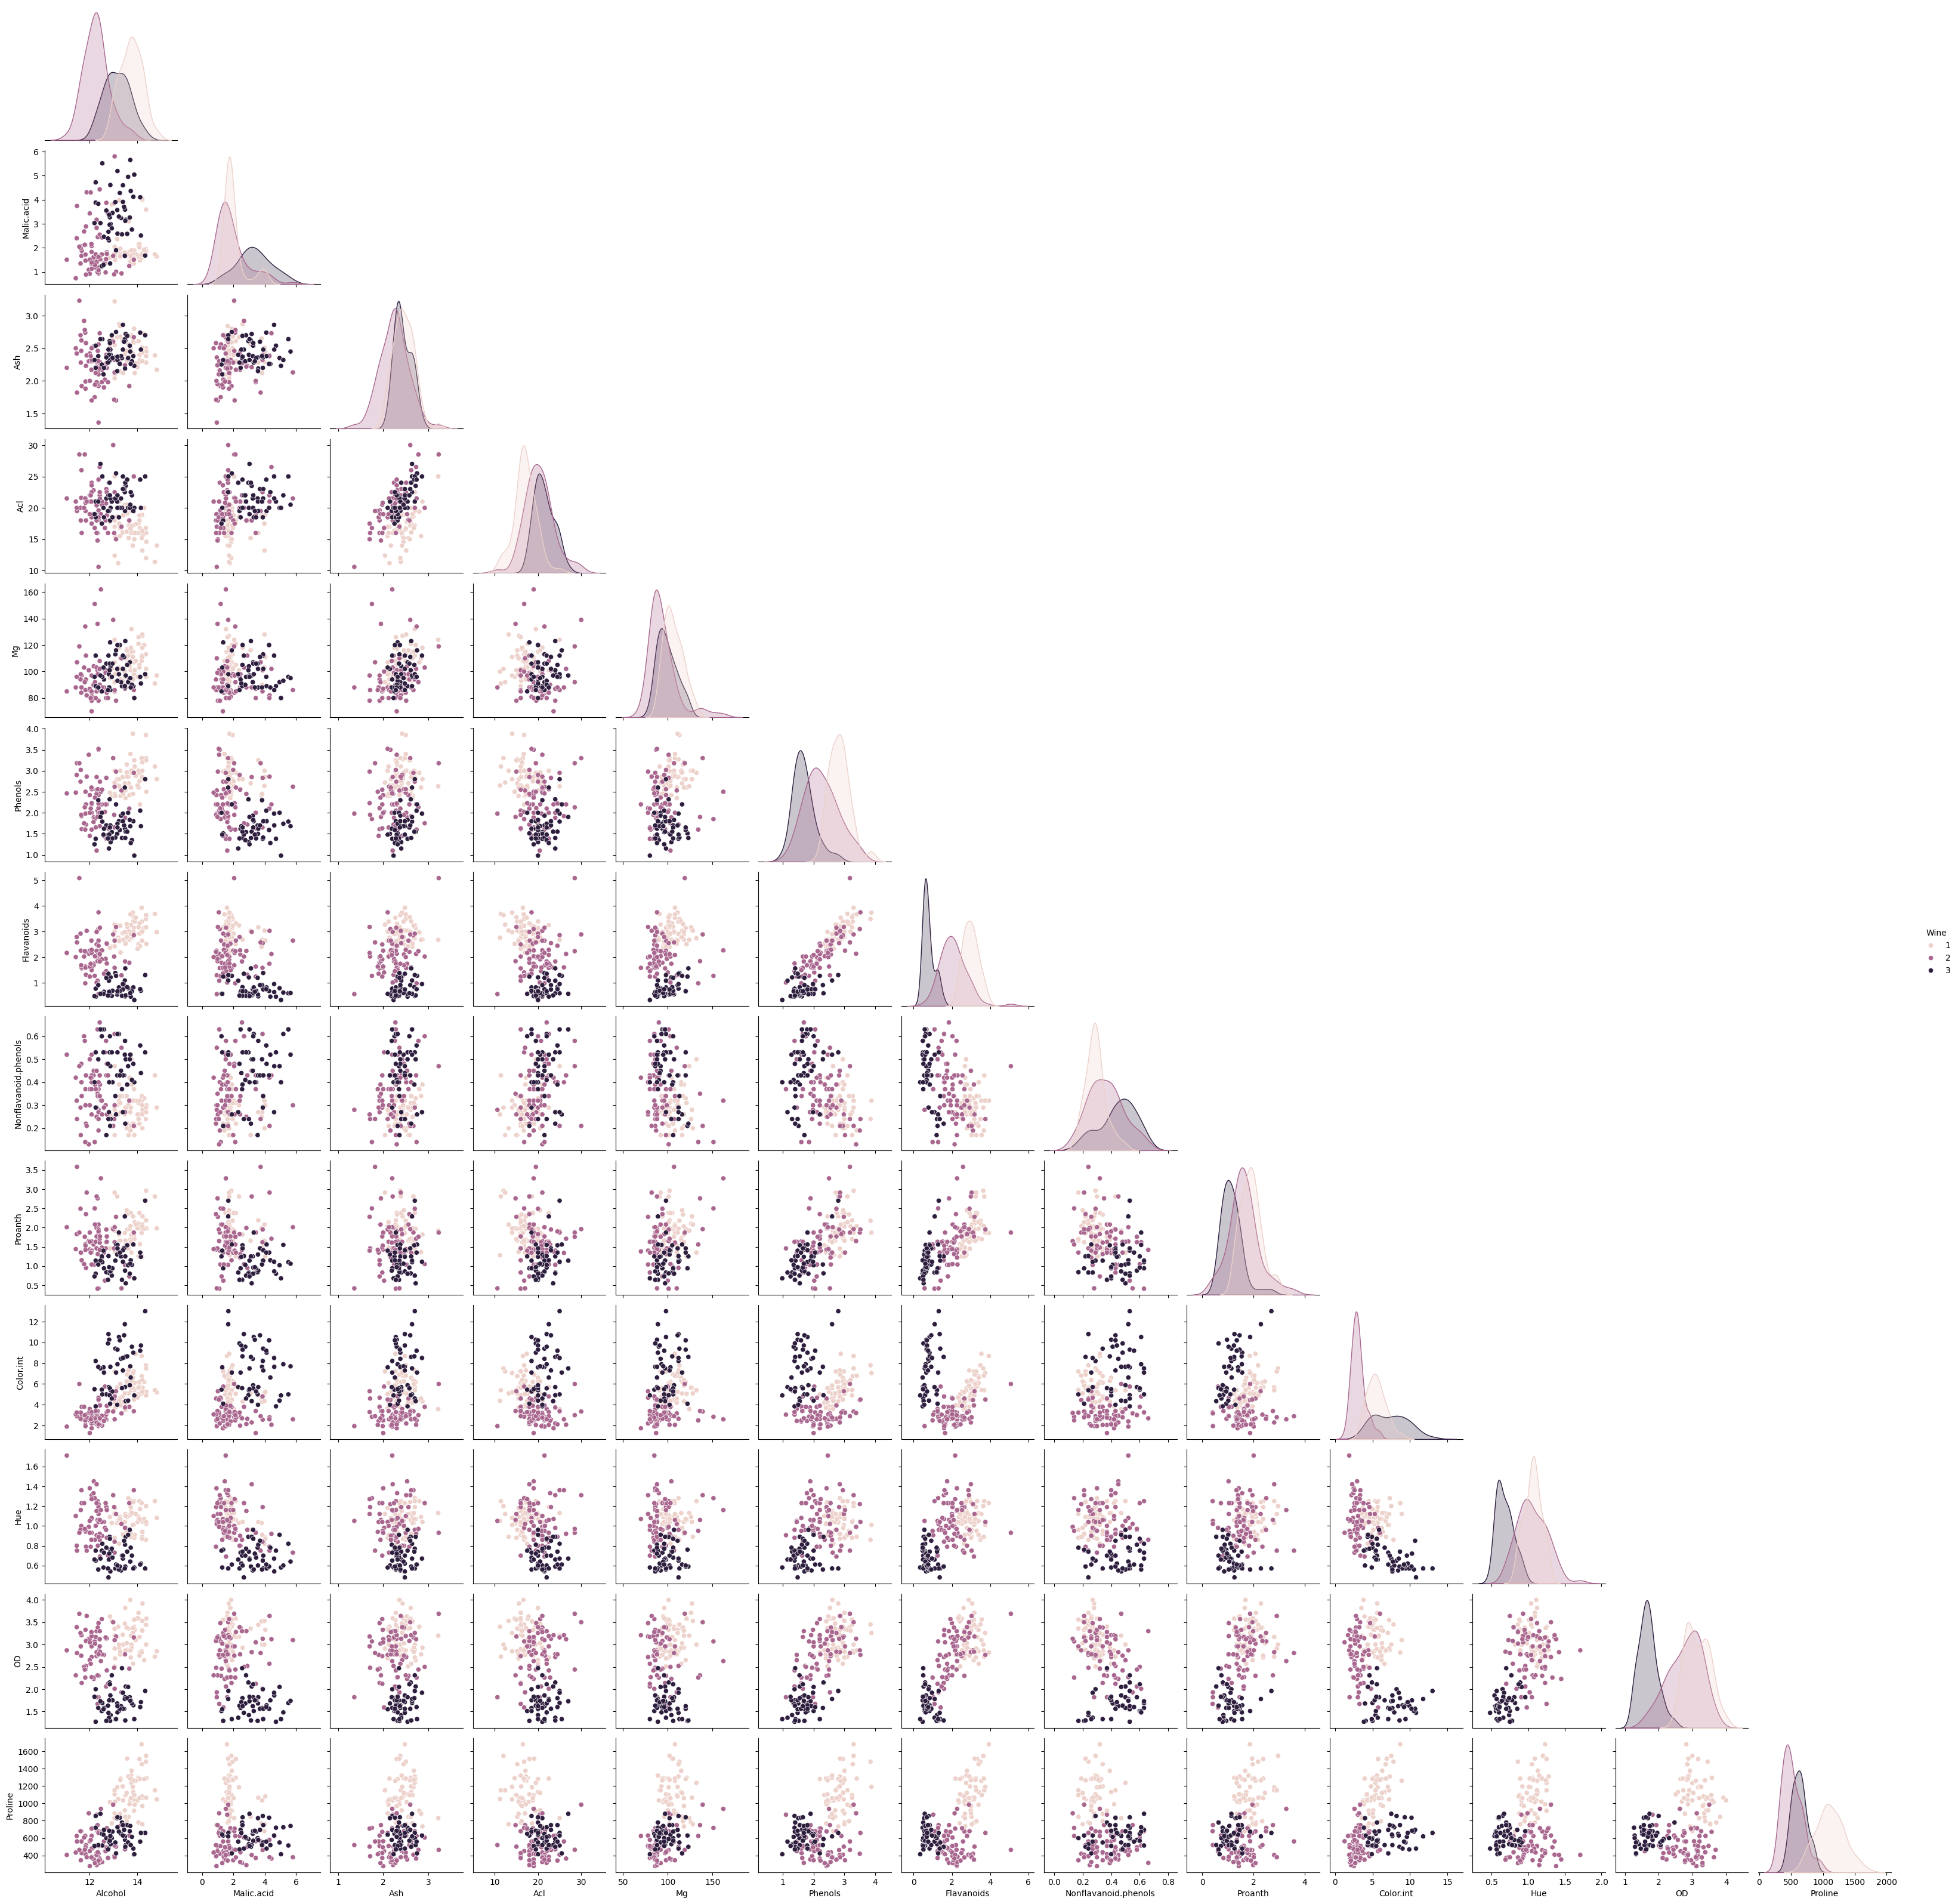

In [156]:
sns.pairplot(df, hue='Wine', corner=True)
plt.show()

Split Data and removing OD because model can be overfit (see correlation map)

In [157]:
x = df.drop(columns=['Wine','OD'])
y = df['Wine']

Optimal number of features: 12


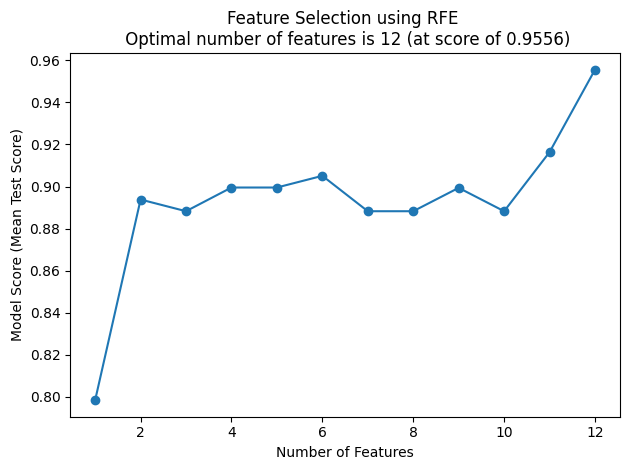

Selected Features (12):
Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'Proline'],
      dtype='object')


In [158]:
# import rfecv and logistik reg
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Define X and y
X = pd.DataFrame(x, columns=x.columns)
y = y

# Initialize the model and RFECV
regressor = LogisticRegression()
feature_selector = RFECV(regressor, cv=5, scoring='accuracy')

# Fit the RFECV model
fit = feature_selector.fit(x, y)

# Get the optimal number of features
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

# Get the reduced feature setttributeError: 'RFECV' object has no attribute 'grid_scores_'
X_new = X.loc[:, feature_selector.get_support()]

# Plot the scores
plt.plot(
    range(1, len(feature_selector.cv_results_['mean_test_score']) + 1),
    feature_selector.cv_results_['mean_test_score'],
    marker="o"
)
plt.ylabel("Model Score (Mean Test Score)")
plt.xlabel("Number of Features")
plt.title(
    f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} "
    f"(at score of {round(max(feature_selector.cv_results_['mean_test_score']), 4)})"
)
plt.tight_layout()
plt.show()

# Get the mask of selected features
selected_features_mask = feature_selector.get_support()

# Get the names of selected features
selected_features = x.columns[selected_features_mask]

print(f"Selected Features ({len(selected_features)}):")
print(selected_features)

Winsorize Function for outlier removing

In [159]:
from sklearn.preprocessing import FunctionTransformer

def winsorizeFunc(x, columns):
  x_copy = x.copy()

  for col in columns:
    Q1 = np.percentile(x_copy[col], 25)
    Q3 = np.percentile(x_copy[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    x_copy[col] = np.clip(x_copy[col], lower_bound, upper_bound)
  return x_copy

outlierRemover = FunctionTransformer(
    func= lambda x: winsorizeFunc(pd.DataFrame(x, columns=x.columns), outlier_column)
)

# Modeling

In [160]:
def k_fold_scoring(pipeline, X, y, cv=5):
  scores = cross_val_score(pipeline, X, y, cv=cv)
  print(f"Mean: {scores.mean()}")
  print(f"Standard Dev: {scores.std()}")

Pipeline

In [161]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

preprocessor = ColumnTransformer(
    [
        ('winsorize', outlierRemover, x.columns),
        ('scale', RobustScaler(), x.columns),
    ]
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', LogisticRegression())
])

GridCV for Model Parameter

In [162]:
param_grid = {
    'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg', 'newton-cholesky'],
    'clf__tol': [1e-3, 1e-5, 1e-10],
    'clf__penalty': ['l1', 'l2', None],
    'clf__random_state': [26],
    'clf__max_iter': range(100, 1000, 100),
}

In [163]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5)

grid_search.fit(x, y)

best_model = grid_search.best_estimator_
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('winsorize',
                                                  FunctionTransformer(func=<function <lambda> at 0x7d57987fc5e0>),
                                                  Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'Proline'],
      dtype='object')),
                                                 ('scale', RobustScaler(),
                                                  Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'Proline'],
      dtype='object'))])),
                ('clf',
                 LogisticRegression(max_iter=500, random_state=26, tol=0.001))])

In [164]:
grid_search.best_params_

{'clf__max_iter': 500,
 'clf__penalty': 'l2',
 'clf__random_state': 26,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.001}

In [165]:
k_fold_scoring(best_model, x, y, cv=5)

Mean: 0.9944444444444445
Standard Dev: 0.011111111111111117
